In [3]:
from features.feature_constructor import Feature, GEO_GRAIN_LEN_MAP
from features.violence_calls import ViolenceCalls
from features.population import Population
from detroit_geos import get_detroit_census_geos, get_detroit_boundaries

# Framework
`help(Feature)` gives a reasonable docstring, but may be easier to just look at the code, which contains descriptions of every method

We'll concentrate on using a child class - population

## Population example

In [4]:
# The Population class contains reference information for the data set
# Instantiating the object does not load the data by default
population = Population(year=2020, data_path = '.', population_data_path='population', verbose=True)

In [5]:
# loading the data is not a raw load, it contains transforms that we well always want, like column selection and renaming
population.load_data()
population.data.head()

# This decorated method standardizes block ids and does validation, in addition to any additional cleaning you may want to do
# population.cleanse_data()
# self = population

Loaded 14691 rows


,block_id,population,geo_id
0,1000000US261635001001000,14,2.616350e+14
1,1000000US261635001001001,100,2.616350e+14
2,1000000US261635001001002,82,2.616350e+14
3,1000000US261635001001003,50,2.616350e+14
4,1000000US261635001001004,66,2.616350e+14


In [8]:
# this decorated method will automatically run the above steps and load data + set the index as necessary if it hasn't be done yet
# It defaults to full data load, so if the data set is large, you may want to load the data with custom arguments instead of doing 
# it automatically

# Outputs a series, which is the goal of this class
block_group_population = population.construct_feature(target_geo_grain='block group')
block_group_population 

Data not yet cleansed, cleaning
clean data has 14691 rows
cleansed data validator: geo_id looks good
Generate index not run, or was run on the wrong grain. Creating index on block group grain
0 of 698 block groups are unaccounted for


,population
geo,
2.616350e+11,1331
2.616350e+11,2665
2.616350e+11,857
2.616350e+11,2180
2.616350e+11,1005
...,...
2.616399e+11,0
2.616399e+11,0
2.616399e+11,0


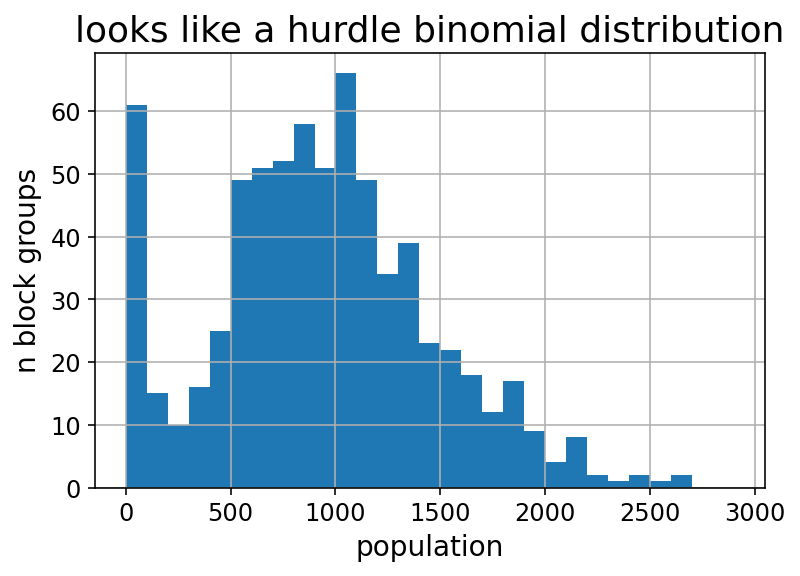

In [9]:
block_group_population.hist(bins=np.arange(0,3000,100))
_ = plt.gca().set(title='looks like a hurdle binomial distribution',xlabel='population',ylabel='n block groups')

## Violent calls example
spoiler: it works the same, but with some extra args

In [1]:
from features.feature_constructor import Feature
from features.violence_calls import ViolenceCalls
from features.population import Population
from detroit_geos import get_detroit_census_geos

/Users/ahakso/.virtualenvs/detroit/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
call_feat = ViolenceCalls(decennial_census_year=2010)
call_feat.load_data(use_lat_long=False,sample_rows=10000)
# # call_feat.cleanse_data()
# call_feat.construct_feature(target_geo_grain='block')

Loaded 10,000 rows of data


In [3]:
call_feat.data.head()

,priority,calldescription,category,call_timestamp,officerinitiated,geo_id,longitude,latitude,oid,geometry
0,1,FELONIOUS ASSAULT IP,FA IP,2020-06-25 10:53:47-04:04,No,2.616355e+14,-83.219314,42.336093,3079341,POINT (-83.21931 42.33609)
1,2,ASSAULT AND BATTERY IP-JH,AB IP/JH,2020-06-25 10:56:22-04:04,No,2.616354e+14,-83.142711,42.409890,3079346,POINT (-83.14271 42.40989)
2,4,FELONIOUS ASSAULT REPORT,FA RPT,2020-06-25 10:56:58-04:04,Yes,NaN,-84.132207,42.082976,3079351,POINT (-84.13221 42.08298)
3,1,FELONIOUS ASSAULT IP,FA IP,2020-06-25 11:10:09-04:04,No,2.616351e+14,-82.956673,42.392132,3079387,POINT (-82.95667 42.39213)
4,1,SHOOTING/CUTTING/PENT WOUND,GSWCUT,2020-06-25 11:12:11-04:04,No,2.616354e+14,-83.133122,42.422717,3079399,POINT (-83.13312 42.42272)


In [4]:
# without reloading or recleaning the data, you can regenerate a new feature vector on a different grain
ftr = call_feat.construct_feature(target_geo_grain='tract')

ftr

Data not yet cleansed, cleaning
clean data has 769 rows
cleansed data validator: geo_id looks good
Generate index not run, or was run on the wrong grain. Creating index on tract grain


,violence_calls
geo,
2.616350e+10,5
2.616350e+10,3
2.616350e+10,9
2.616350e+10,10
2.616350e+10,8
...,...
2.616357e+10,2
2.616398e+10,2
2.616399e+10,3


In [27]:
call_feat.open_data_url('source')

# Rental Statuses

In [1]:
from detroit_geos import get_detroit_census_geos
from util_detroit import point_to_geo_id
import geopandas as gpd
from features.out_of_state_rental_ownership import OutOfStateRentalOwnership

/Users/ahakso/.virtualenvs/detroit/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [4]:
r = OutOfStateRentalOwnership(decennial_census_year=2010)
f = r.construct_feature(target_geo_grain='tract')

Data not yet loaded, loading all data
Data not yet cleansed, cleaning
clean data has 14550 rows
cleansed data validator: geo_id looks good
Generate index not run, or was run on the wrong grain. Creating index on tract grain


# Income

In [1]:
from features.feature_constructor import Feature
from features.income import Income
from detroit_geos import get_detroit_census_geos
from features.feature_constructor import GEO_GRAIN_LEN_MAP

/Users/ahakso/.virtualenvs/detroit/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
ftr = Income()
ftr.load_data()
ftr.cleanse_data()

clean data has 611 rows
cleansed data validator: geo_id looks good


In [7]:
f = ftr.construct_feature('block')

Generate index not run, or was run on the wrong grain. Creating index on block grain


<AxesSubplot:>

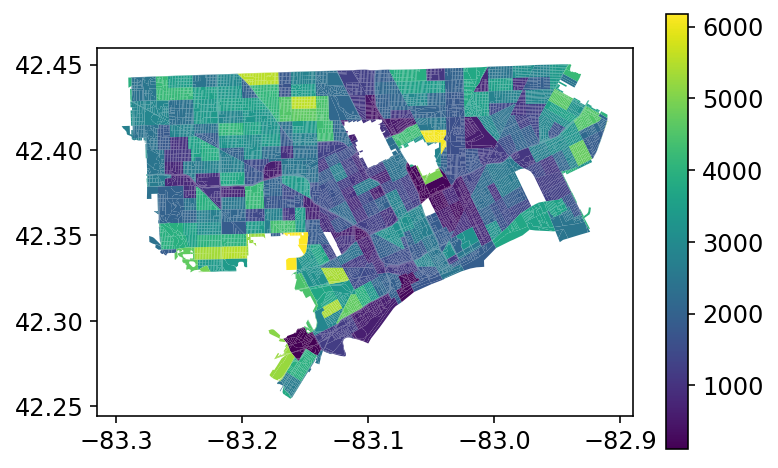

In [99]:
df.plot('per_capita_income',legend=True)